# Healthcare Dataset
### Conduct analysis on the Healthcare Dataset 
### Determine correlations between attributes and present the data in a visual format for better comprehension.

In [1]:
## import library and read csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Cleaning Data

In [2]:
# Assuming 'df' is your DataFrame
missing_data = df.isnull()
df = df.dropna()
final_df = df.copy()

# Summarize the missing data
print("Missing Data Summary:")
print(missing_data.sum())

Missing Data Summary:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
#Obesity_Group
conditions = [
    (final_df['bmi'] < 18.5),                 # Underweight
    (final_df['bmi'] >= 18.5) & (final_df['bmi'] < 24.9),  # Normal Weight
    (final_df['bmi'] >= 25) & (final_df['bmi'] < 29.9),    # Overweight
    (final_df['bmi'] >= 30) & (final_df['bmi'] < 34.9),    # Obesity Class 1
    (final_df['bmi'] >= 35) & (final_df['bmi'] < 39.9),    # Obesity Class 2
    (final_df['bmi'] >= 40)                       # Obesity Class 3 (Morbid Obesity)
]

# Define labels for each obesity group
labels = ["Underweight", "Normal Weight", "Overweight", "Obesity Class 1", "Obesity Class 2", "Obesity Class 3"]

final_df['Obesity_Group'] = np.select(conditions, labels, default='Unknown')

In [5]:
#Age group
conditions = [
    (final_df['age'] < 3),                            # Babies
    (final_df['age'] >= 3) & (final_df['age'] < 16),  # Children
    (final_df['age'] >= 17) & (final_df['age'] < 30), # Young Adults
    (final_df['age'] >= 31) & (final_df['age'] < 45), #middle-aged Adults
    (final_df['age'] >= 45)                           # Old adults
]

# Define labels for each obesity group
labels = ["Babies", "Children", "Young Adults", "middle-aged Adults", "Old adults"]

final_df['Age_group'] = np.select(conditions, labels, default='Unknown')

In [6]:
#create dataframe for calculate correlation
corr_df = df.copy()

## One-Hot Encoding For Calculate Corelation

In [7]:
#replace string value with numeric value
corr_df['ever_married']=df['ever_married'].replace(['Yes','No'],[1,0])
corr_df['gender']=df['gender'].replace(['Male','Female'],[1,0])

corr_df =  corr_df.drop(columns =["id","smoking_status","Residence_type","work_type"])

In [8]:
corr_df = pd.concat([corr_df,pd.get_dummies(df.smoking_status).add_prefix("smoking_status_")],axis=1)
corr_df = pd.concat([corr_df,pd.get_dummies(df.Residence_type).add_prefix("Residence_type_")],axis=1)
corr_df = pd.concat([corr_df,pd.get_dummies(df.work_type).add_prefix("work_type_")],axis=1)




In [9]:
corr_df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0,1,0,0
2,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,171.23,34.4,1,0,0,0,1,0,1,0,0,1,0,0
4,0,79.0,1,0,1,174.12,24.0,1,0,0,1,0,1,0,0,0,0,1,0
5,1,81.0,0,0,1,186.21,29.0,1,0,1,0,0,0,1,0,0,1,0,0


In [10]:
#calculate correlation
corr_df.corr()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
age,1.000000,0.274425,0.257123,0.680782,0.235838,0.333398,0.232331,-0.389577,0.242404,0.124377,0.076801,-0.010948,0.010948,0.133593,-0.079384,0.120021,0.327347,-0.634937
hypertension,0.274425,1.000000,0.115991,0.162406,0.180543,0.167811,0.142515,-0.143219,0.062078,0.066717,0.028214,0.001074,-0.001074,0.019232,-0.021341,-0.004637,0.111794,-0.126561
heart_disease,0.257123,0.115991,1.000000,0.111245,0.154525,0.041357,0.137938,-0.074468,0.071339,-0.020685,0.048686,0.002362,-0.002362,0.005095,-0.015312,-0.000279,0.081484,-0.088072
ever_married,0.680782,0.162406,0.111245,1.000000,0.151377,0.341695,0.105089,-0.338169,0.176007,0.105253,0.106574,-0.004989,0.004989,0.137915,-0.091976,0.156818,0.191469,-0.545462
avg_glucose_level,0.235838,0.180543,0.154525,0.151377,1.000000,0.175502,0.138936,-0.103225,0.074250,0.032085,0.010981,0.007617,-0.007617,0.017723,-0.013991,0.009273,0.069051,-0.101182
bmi,0.333398,0.167811,0.041357,0.341695,0.175502,1.000000,0.042374,-0.270340,0.107031,0.107964,0.088324,0.000122,-0.000122,0.079584,-0.028602,0.208029,0.072701,-0.448674
stroke,0.232331,0.142515,0.137938,0.105089,0.138936,0.042374,1.000000,-0.075016,0.057320,0.010723,0.021530,-0.006031,0.006031,0.003553,-0.014149,0.014934,0.055356,-0.080971
smoking_status_Unknown,-0.389577,-0.143219,-0.074468,-0.338169,-0.103225,-0.270340,-0.075016,1.000000,-0.298288,-0.512094,-0.276528,0.006411,-0.006411,-0.098583,0.008992,-0.214513,-0.107225,0.516968
smoking_status_formerly smoked,0.242404,0.062078,0.071339,0.176007,0.074250,0.107031,0.057320,-0.298288,1.000000,-0.352884,-0.190555,-0.005902,0.005902,0.030095,-0.030419,0.024872,0.096354,-0.161479
smoking_status_never smoked,0.124377,0.066717,-0.020685,0.105253,0.032085,0.107964,0.010723,-0.512094,-0.352884,1.000000,-0.327141,0.021346,-0.021346,0.046898,0.035866,0.110871,0.029529,-0.243643


## Display Correlation

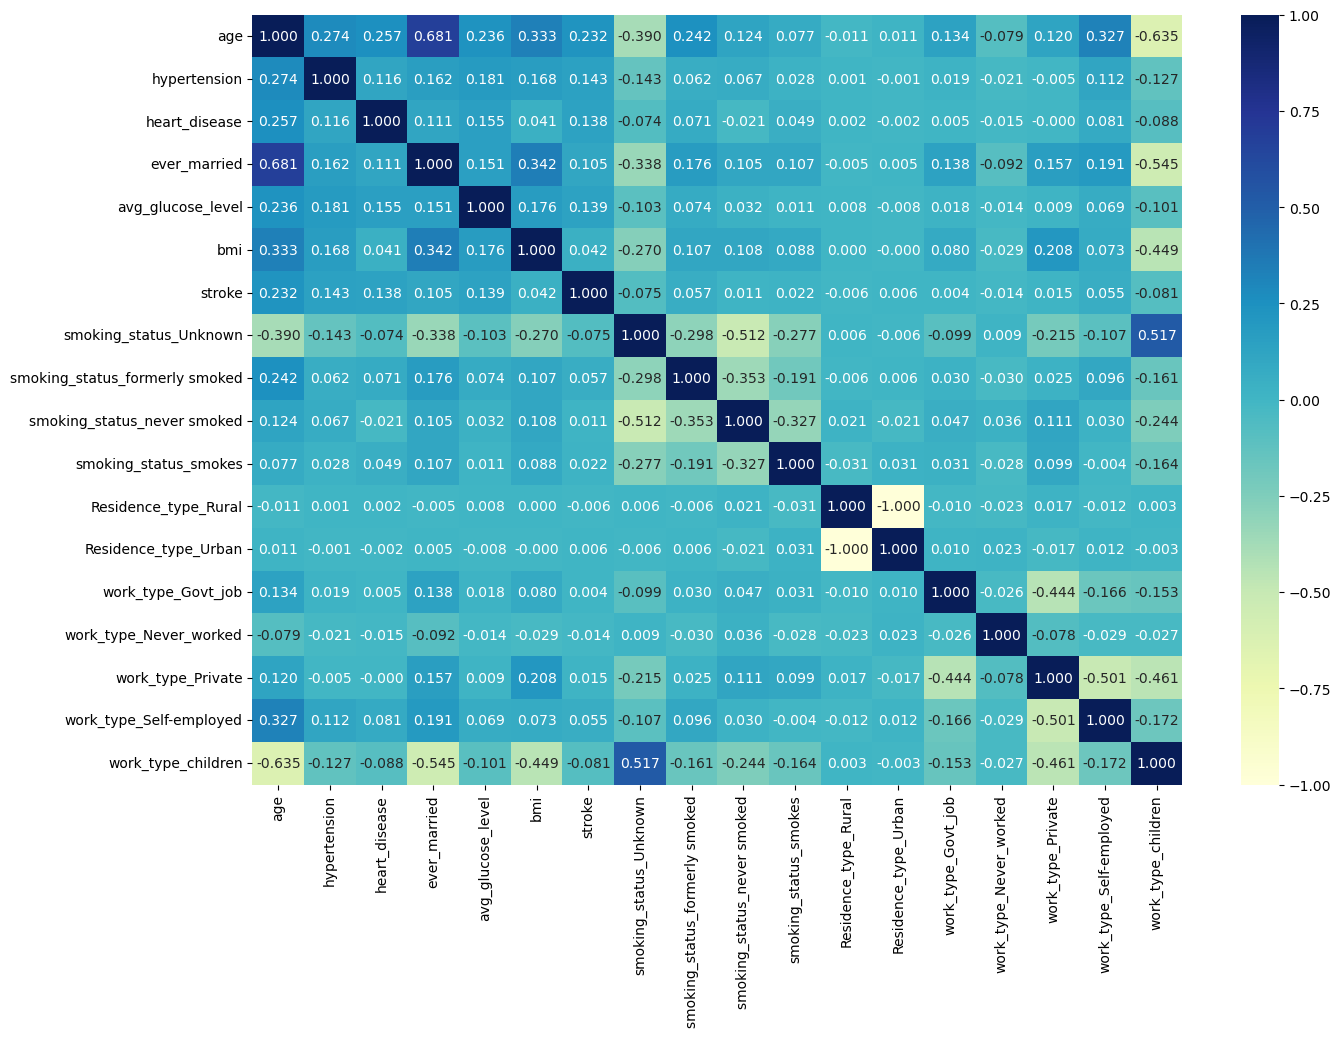

In [11]:
# crate heat map 
plt.figure(figsize=(15, 10))
dataplot = sns.heatmap(corr_df.corr(), cmap="YlGnBu", annot=True, fmt=".3f")
plt.show()

## Display a histogram between age group and heart disease

In [12]:
# Display the count
print("Count of occurrences where heart_disease is true:", final_df[final_df['heart_disease'] == 1].shape[0])

Count of occurrences where heart_disease is true: 243


In [13]:
#count of each age group that has heart disease
final_df.groupby('Age_group')['heart_disease'].sum()

Age_group
Babies                  1
Children                0
Old adults            237
Unknown                 0
Young Adults            1
middle-aged Adults      4
Name: heart_disease, dtype: int64

In [14]:
#count of each age group
final_df.groupby('Age_group')['heart_disease'].count()

Age_group
Babies                 169
Children               558
Old adults            2444
Unknown                104
Young Adults           705
middle-aged Adults     929
Name: heart_disease, dtype: int64

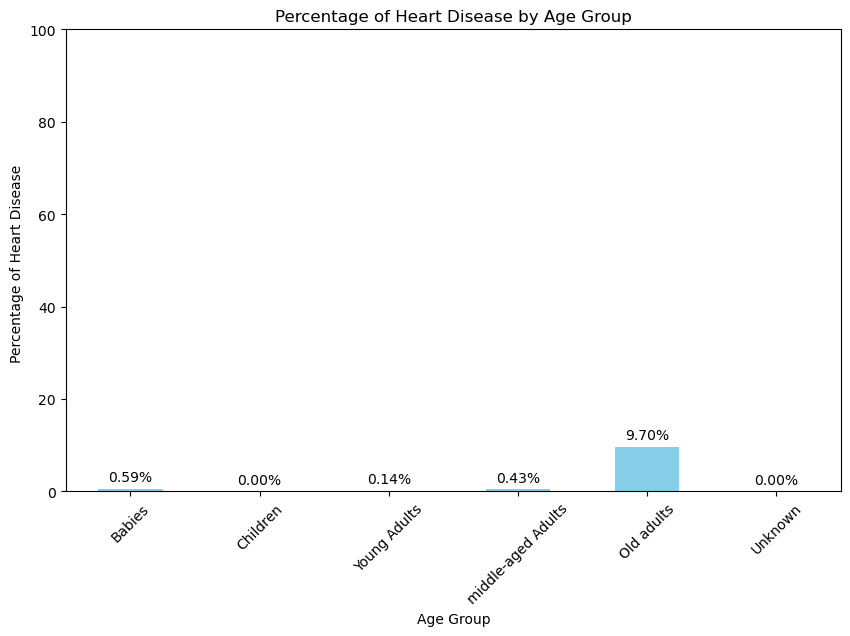

In [15]:
# Define order of age groups
age_group_order = ['Babies', 'Children', 'Young Adults', 'middle-aged Adults', 'Old adults', 'Unknown']

# Reorder the DataFrame 
final_df['Age_group'] = pd.Categorical(final_df['Age_group'], categories=age_group_order, ordered=True)
final_df = final_df.sort_values('Age_group')

# Calculate the percentage of heart disease for each age group
percentage_heart_disease = (final_df.groupby('Age_group')['heart_disease'].sum() / final_df.groupby('Age_group')['heart_disease'].count()) * 100

# Plotting the histogram with annotations
plt.figure(figsize=(10, 6))
bars = percentage_heart_disease.plot(kind='bar', color='skyblue')
plt.title('Percentage of Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Heart Disease ')
plt.ylim(0, 100) 
plt.xticks(rotation=45) 

# Annotate each bar with its value
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height() + 1, f'{bar.get_height():.2f}%', ha='center', va='bottom')
plt.show()

## Display a histogram between age group and stroke

In [16]:
#count of each age group that has heart disease
final_df.groupby('Age_group')['stroke'].sum()

Age_group
Babies                  0
Children                1
Young Adults            0
middle-aged Adults      7
Old adults            201
Unknown                 0
Name: stroke, dtype: int64

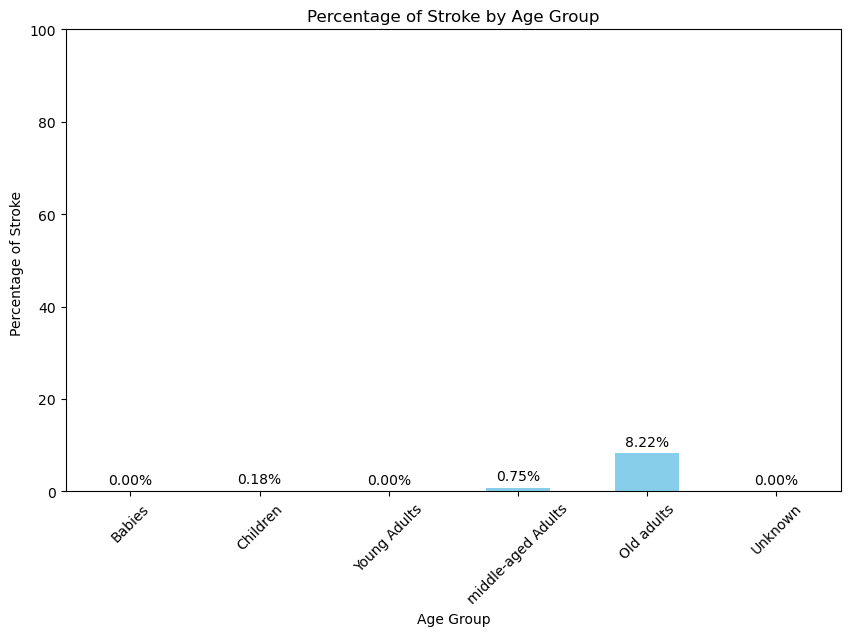

In [17]:
# Calculate the percentage of stroke for each age group
percentage_stroke = (final_df.groupby('Age_group')['stroke'].sum() / final_df.groupby('Age_group')['stroke'].count()) * 100

# Plotting the histogram with annotations
plt.figure(figsize=(10, 6))
bars = percentage_stroke.plot(kind='bar', color='skyblue')
plt.title('Percentage of Stroke by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Stroke ')
plt.ylim(0, 100) 
plt.xticks(rotation=45) 

# Annotate each bar with its value
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height() + 1, f'{bar.get_height():.2f}%', ha='center', va='bottom')

plt.show()

## Find the correlation between age and heart disease

In [18]:
from scipy.stats import pearsonr

# หาค่าสหสัมพันธ์และ p-value ระหว่างอายุกับการเป็นโรคหัวใจ
corr_heart_disease, p_value_heart_disease = pearsonr(final_df['age'], final_df['heart_disease'])

# หาค่าสหสัมพันธ์และ p-value ระหว่างอายุกับการเป็น stroke
corr_stroke, p_value_stroke = pearsonr(final_df['age'], final_df['stroke'])

corr_heart_disease, p_value_heart_disease, corr_stroke, p_value_stroke

print(" P-value for Age and Heart Disease :", p_value_heart_disease)
print(" P-value for Age and Stroke :", p_value_stroke)
print("\n")
print("Correlation between Age and Heart Disease:", corr_heart_disease)
print("Correlation between Age and Stroke:", corr_stroke)

 P-value for Age and Heart Disease : 5.797873004769672e-75
 P-value for Age and Stroke : 3.655693322006298e-61


Correlation between Age and Heart Disease: 0.2571227762538473
Correlation between Age and Stroke: 0.23233085553484958


####  age and heart disease, age and stroke are  statistically significant.

## Visualize scatter plot of age and stroke, age and heart disease

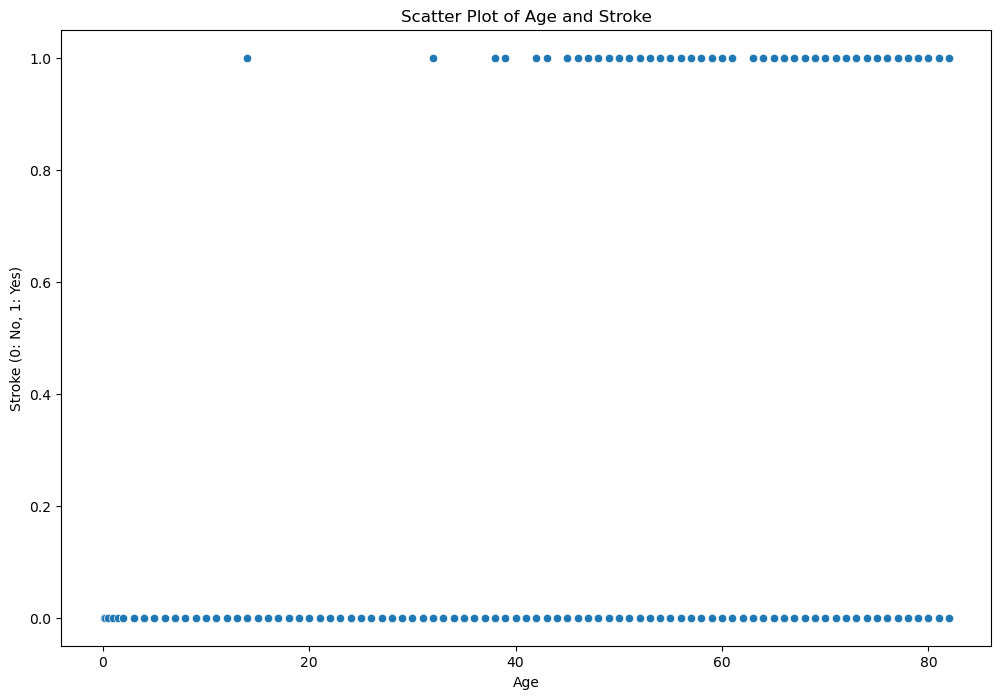

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Create a scatter plot
sns.scatterplot(x='age', y='stroke', data=final_df)

# Adding labels and title
plt.title('Scatter Plot of Age and Stroke')
plt.xlabel('Age')
plt.ylabel('Stroke (0: No, 1: Yes)')

# Display the plot
plt.show()


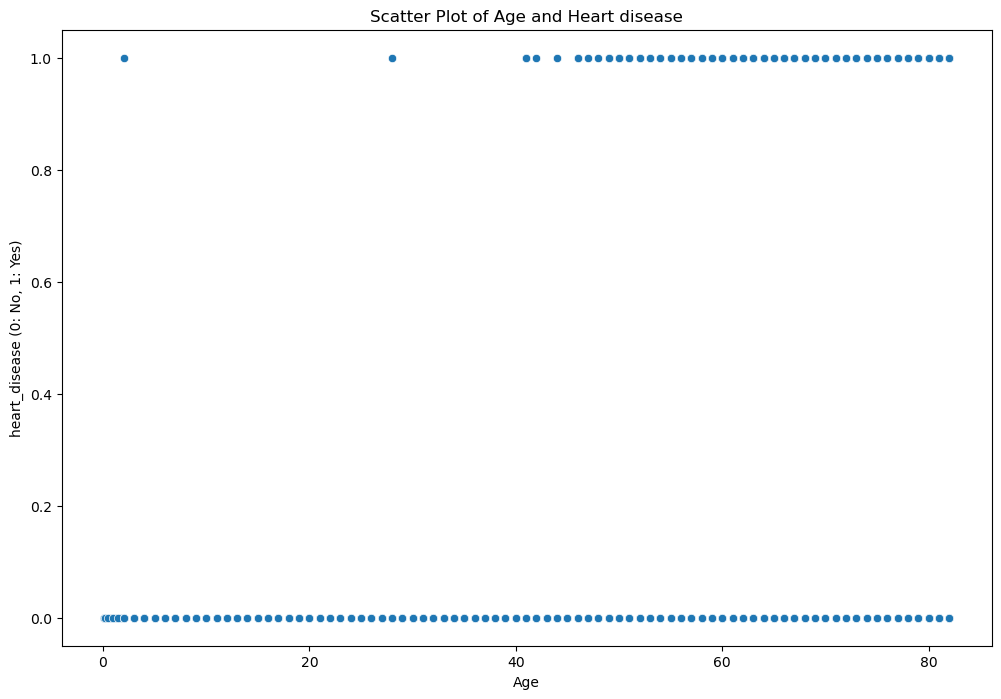

In [20]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='heart_disease', data=final_df)

# Adding labels and title
plt.title('Scatter Plot of Age and Heart disease')
plt.xlabel('Age')
plt.ylabel('heart_disease (0: No, 1: Yes)')

# Display the plot
plt.show()

## Use T-test to find the difference between smoking status and hypertesion, heart disease

In [22]:
from scipy.stats import ttest_ind

t_stat_hypertension, p_value_hypertension = ttest_ind(
    final_df[final_df['smoking_status'] == 'smokes']['hypertension'],
    final_df[final_df['smoking_status'] != 'smokes']['hypertension']
)

t_stat_heart_disease, p_value_heart_disease = ttest_ind(
    final_df[final_df['smoking_status'] == 'smokes']['heart_disease'],
    final_df[final_df['smoking_status'] != 'smokes']['heart_disease']
)

t_stat_hypertension, p_value_hypertension, t_stat_heart_disease, p_value_heart_disease

print(" P-value for Smokes and Heart Disease :", p_value_heart_disease)
print(" P-value for Smokes and Hypertension :", p_value_hypertension)

 P-value for Smokes and Heart Disease : 0.000644210707326782
 P-value for Smokes and Hypertension : 0.04807489710630816


#### there is a statistically significant difference in heart disease between smokers and non-smokers and hypertension between smokers and non-smokers.

## Display of p

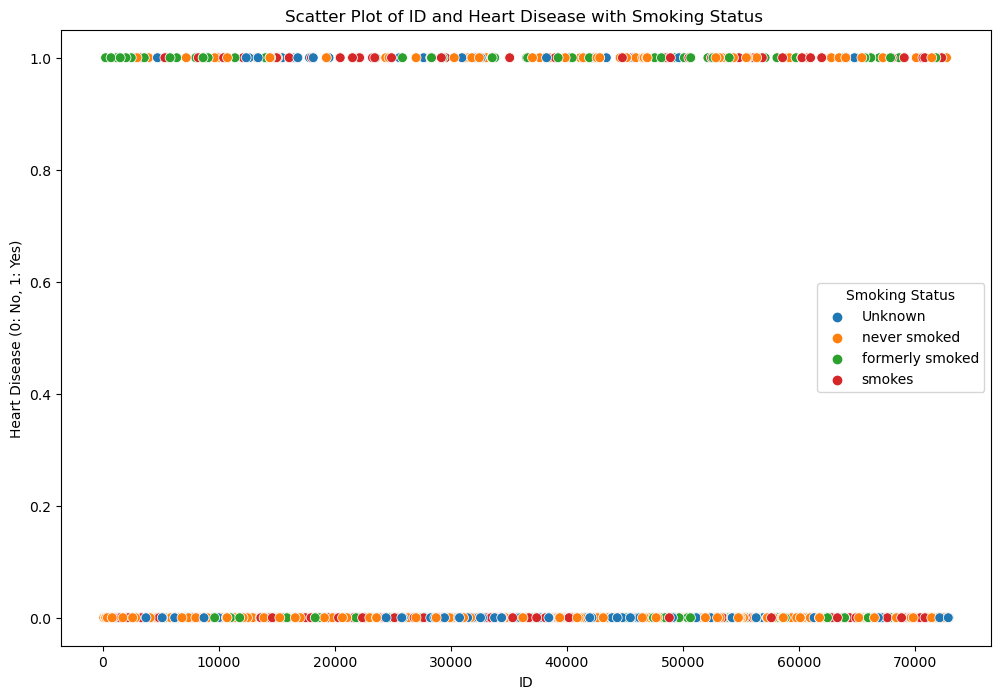

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Create a scatter plot
sns.scatterplot(x='id', y='heart_disease', hue='smoking_status', data=final_df, s=50)

# Adding labels and title
plt.title('Scatter Plot of ID and Heart Disease with Smoking Status ')
plt.xlabel('ID')
plt.ylabel('Heart Disease (0: No, 1: Yes)')

# Show legend
plt.legend(title='Smoking Status')

# Display the plot
plt.show()


## Visualize work type and stroke

In [24]:
final_df.groupby('work_type')['stroke'].sum()

work_type
Govt_job          28
Never_worked       0
Private          127
Self-employed     53
children           1
Name: stroke, dtype: int64

In [25]:
final_df.groupby('work_type')['stroke'].count()

work_type
Govt_job          630
Never_worked       22
Private          2811
Self-employed     775
children          671
Name: stroke, dtype: int64

In [26]:
work_type_order = ['children', 'Govt_job', 'Private', 'Self-employed', 'Never_worked']
# reorder
final_df['work_type'] = pd.Categorical(final_df['work_type'], categories=work_type_order, ordered=True)
percentage_stroke_work_type = (final_df.groupby('work_type')['stroke'].sum() / final_df.groupby('work_type')['stroke'].count()) * 100
print("Percentage of Stroke by Work Type:")
for work_type, percentage in percentage_stroke_work_type.items():
    formatted_percentage = '{:.2f}%'.format(percentage)
    print(f"{work_type}: {formatted_percentage}")

Percentage of Stroke by Work Type:
children: 0.15%
Govt_job: 4.44%
Private: 4.52%
Self-employed: 6.84%
Never_worked: 0.00%


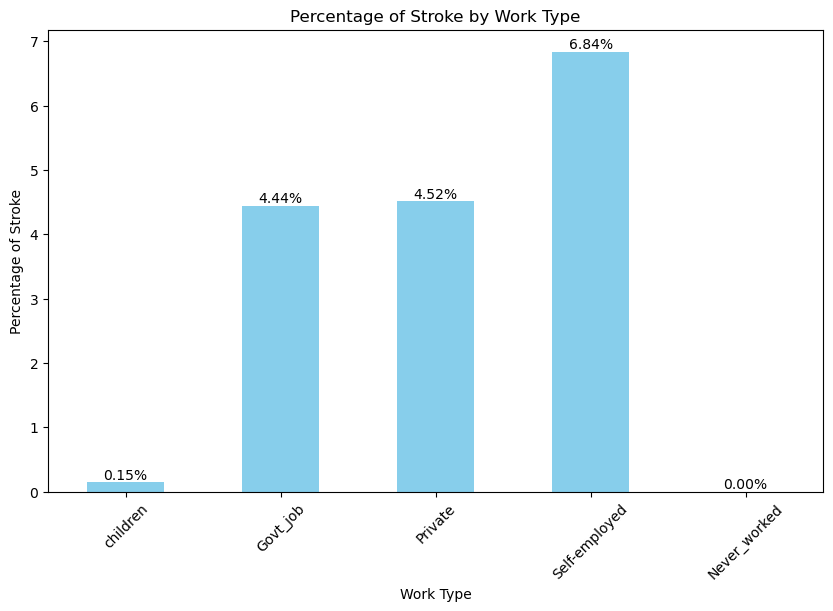

In [27]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
percentage_stroke_work_type.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Percentage of Stroke by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Percentage of Stroke')
plt.xticks(rotation=45) 

# Annotate each bar with its percentage
for i, value in enumerate(percentage_stroke_work_type):
    plt.text(i, value , f'{value:.2f}%', ha='center', va='bottom')
    

# Display the plot
plt.show()